In [59]:
import cv2
import matplotlib.pyplot as plt

#from google.colab.patches import cv2_imshow
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
def cv2_imshow(img, cmap='gray', figsize=(10, 10)):
    plt.figure(figsize=figsize)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=cmap)

In [111]:
#img1 = cv2.imread("vitalur.png")
img1 = cv2.imread("can.jpg")
img1 = img1[:,:,::-1]

#img2 = cv2.imread("vitalurs.jpg")
img2 = cv2.imread("products.png")
img2 = img2[:,:,::-1]

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

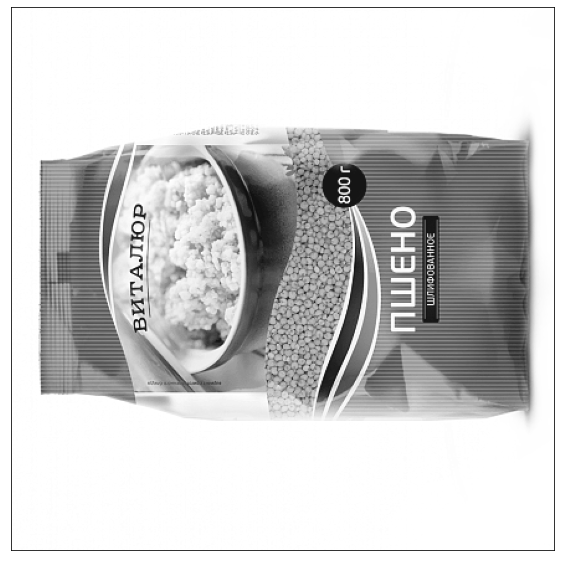

In [112]:
cv2_imshow(img1_gray)

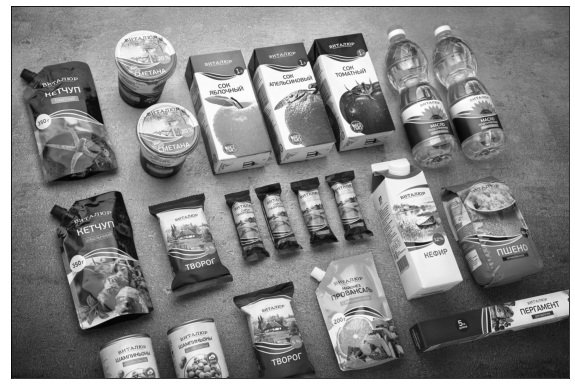

In [113]:
cv2_imshow(img2_gray)

In [122]:
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

FLAN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLAN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch (descriptors1, descriptors2,k=2)
matchesMask = [[0,0] for i in range(len(matches))]

good_matches = []
for i,(m1, m2) in enumerate (matches):
  if m1.distance < 0.5 * m2.distance:
    matchesMask[i] = [1,0]

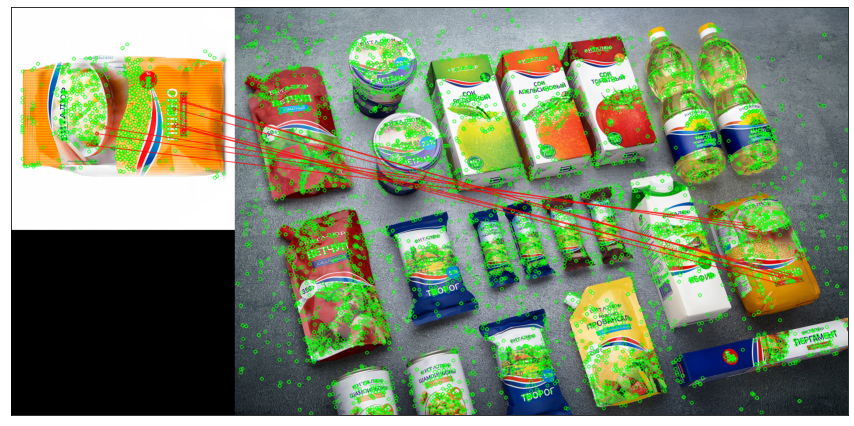

In [123]:
draw_params = dict (matchColor = (255,0,), singlePointColor = (0,255,0), matchesMask = matchesMask, flags=0 )
flann_matches =cv2.drawMatchesKnn(img1, keypoints1, img2, keypoints2, matches, None,**draw_params)
cv2_imshow(flann_matches, cmap=None, figsize=(15, 15))

In [97]:
print(*draw_params)

matchColor singlePointColor matchesMask flags


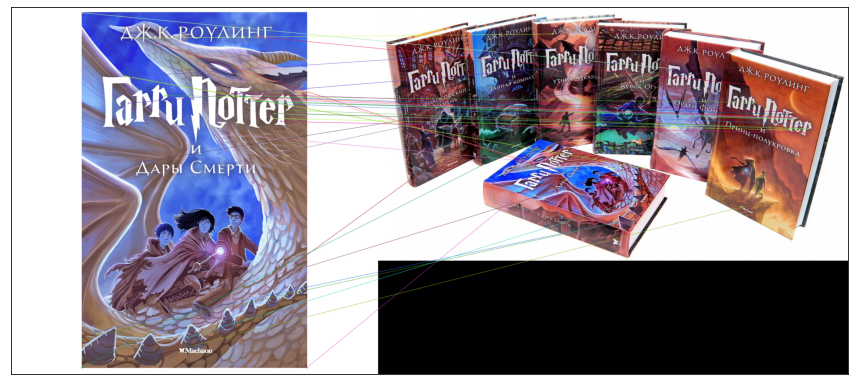

In [78]:
SIFT_matches =cv2.drawMatchesKnn(img1, keypoints1, img2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
cv2_imshow(SIFT_matches, cmap=None, figsize=(15, 15))